Fashion MNIST dataset

In [1]:
from keras.datasets import fashion_mnist

(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


Analyze the data

In [2]:
import numpy as np

from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt

%matplotlib inline

print('Training data shape : ', train_X.shape,
train_Y.shape)

print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [3]:
# Find the unique numbers from the train labels

classes = np.unique(train_Y)

nClasses = len(classes)

print('Total number of outputs : ', nClasses)

print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : 9')

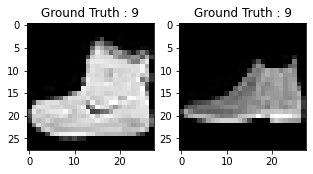

In [4]:
plt.figure(figsize=[5,5])#

# Display the first image in training data

plt.subplot(121)

plt.imshow(train_X[0,:,:], cmap='gray')

plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data

plt.subplot(122)

plt.imshow(test_X[0,:,:], cmap='gray')

plt.title("Ground Truth : {}".format(test_Y[0]))

Data Preprocessing

In [5]:
train_X = train_X.reshape(-1, 28,28, 1)

test_X = test_X.reshape(-1, 28,28, 1)

train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [6]:
train_X = train_X.astype('float32')

test_X = test_X.astype('float32')

train_X = train_X / 255.

test_X = test_X / 255.

One Hot Encoding

In [9]:
import tensorflow as tf

# Change the labels from categorical to one-hot encoding

train_Y_one_hot = tf.keras.utils.to_categorical(train_Y)

test_Y_one_hot = tf.keras.utils.to_categorical(test_Y)

# Display the change for category label using one-hot
encodingtrain_Y_one_hot = tf.keras.utils.to_categorical(train_Y)

test_Y_one_hot = tf.keras.utils.to_categorical(test_Y)

print('Original label:', train_Y[0])

print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 9
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


Splitting Data

In [10]:
from sklearn.model_selection import train_test_split

train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot,
test_size=0.2, random_state=13)

# For one last time let's check the shape of training and validation set.

train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

Model the Data

In [11]:
import keras

from keras.models import Sequential,Input,Model

from keras.layers import Dense, Dropout, Flatten

from keras.layers import Conv2D, MaxPooling2D

from keras.layers.normalization import BatchNormalization

from keras.layers.advanced_activations import LeakyReLU

batch_size = 64

epochs = 20

num_classes = 10

Architecture

In [12]:
fashion_model = Sequential()

fashion_model.add(Conv2D(32, kernel_size=(3,
3),activation='linear',input_shape=(28,28,1),padding='same'))

fashion_model.add(LeakyReLU(alpha=0.1))

fashion_model.add(MaxPooling2D((2, 2),padding='same'))

fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))

fashion_model.add(LeakyReLU(alpha=0.1))

fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))

fashion_model.add(LeakyReLU(alpha=0.1))

fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

fashion_model.add(Flatten())

fashion_model.add(Dense(128, activation='linear'))

fashion_model.add(LeakyReLU(alpha=0.1))

fashion_model.add(Dense(num_classes, activation='softmax'))

fashion_model.compile(loss=keras.losses.categorical_crossentropy,
optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

fashion_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         7

Train and test the Model

In [13]:
fashion_train = fashion_model.fit(train_X, train_label,
batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=0)

print('Test loss:', test_eval[0])

print('Test accuracy:', test_eval[1])

Epoch 1/20
750/750 [==============================] - 98s 110ms/step - loss: 0.6598 - accuracy: 0.7588 - val_loss: 0.3355 - val_accuracy: 0.8766
Epoch 2/20
750/750 [==============================] - 82s 109ms/step - loss: 0.3022 - accuracy: 0.8872 - val_loss: 0.2726 - val_accuracy: 0.9008
Epoch 3/20
750/750 [==============================] - 82s 109ms/step - loss: 0.2400 - accuracy: 0.9130 - val_loss: 0.2517 - val_accuracy: 0.9060
Epoch 4/20
750/750 [==============================] - 82s 109ms/step - loss: 0.2038 - accuracy: 0.9249 - val_loss: 0.2382 - val_accuracy: 0.9126
Epoch 5/20
750/750 [==============================] - 82s 109ms/step - loss: 0.1799 - accuracy: 0.9332 - val_loss: 0.2249 - val_accuracy: 0.9193
Epoch 6/20
750/750 [==============================] - 82s 109ms/step - loss: 0.1555 - accuracy: 0.9429 - val_loss: 0.2318 - val_accuracy: 0.9197
Epoch 7/20
750/750 [==============================] - 81s 109ms/step - loss: 0.1376 - accuracy: 0.9492 - val_loss: 0.2402 - val_ac

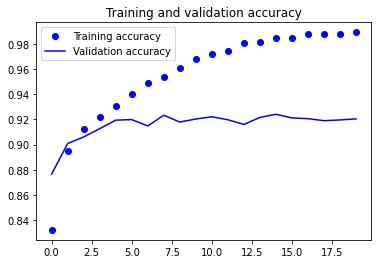

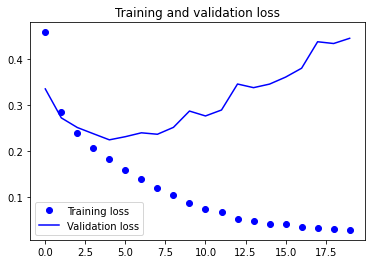

In [14]:
accuracy = fashion_train.history['accuracy']

val_accuracy = fashion_train.history['val_accuracy']

loss = fashion_train.history['loss']

val_loss = fashion_train.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')

plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')

plt.title('Training and validation accuracy')

plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')

plt.plot(epochs, val_loss, 'b', label='Validation loss')

plt.title('Training and validation loss')

plt.legend()

plt.show()

#####The validation loss shows that this is the sign of overfitting, similar to validation accuracy it
#####linearly decreased but after 4-5 epochs, it started to increase. This means that the model tried to
#####memorize the data and succeeded.

Adding Dropout in the network

In [15]:
fashion_model = Sequential()

fashion_model.add(Conv2D(32, kernel_size=(3,
3),activation='linear',padding='same',input_shape=(28,28,1)))

fashion_model.add(LeakyReLU(alpha=0.1))

fashion_model.add(MaxPooling2D((2, 2),padding='same'))

fashion_model.add(Dropout(0.25))

fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))

fashion_model.add(LeakyReLU(alpha=0.1))

fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

fashion_model.add(Dropout(0.25))

fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))

fashion_model.add(LeakyReLU(alpha=0.1))

fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

fashion_model.add(Dropout(0.4))

fashion_model.add(Flatten())

fashion_model.add(Dense(128, activation='linear'))

fashion_model.add(LeakyReLU(alpha=0.1))

fashion_model.add(Dropout(0.3))

fashion_model.add(Dense(num_classes, activation='softmax'))

fashion_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)         

In [16]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy,
optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

fashion_train_dropout = fashion_model.fit(train_X, train_label,
batch_size=batch_size,epochs=20,verbose=1,validation_data=(valid_X, valid_label))

fashion_model.save("fashion_model_dropout.h5py")

test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=1)

print('Test loss:', test_eval[0])

print('Test accuracy:', test_eval[1])

Epoch 1/20
750/750 [==============================] - 89s 116ms/step - loss: 0.8744 - accuracy: 0.6720 - val_loss: 0.4017 - val_accuracy: 0.8543
Epoch 2/20
750/750 [==============================] - 87s 116ms/step - loss: 0.3998 - accuracy: 0.8538 - val_loss: 0.3103 - val_accuracy: 0.8845
Epoch 3/20
750/750 [==============================] - 87s 116ms/step - loss: 0.3365 - accuracy: 0.8766 - val_loss: 0.2858 - val_accuracy: 0.8935
Epoch 4/20
750/750 [==============================] - 87s 116ms/step - loss: 0.3052 - accuracy: 0.8875 - val_loss: 0.2589 - val_accuracy: 0.9066
Epoch 5/20
750/750 [==============================] - 87s 115ms/step - loss: 0.2781 - accuracy: 0.8996 - val_loss: 0.2483 - val_accuracy: 0.9082
Epoch 6/20
750/750 [==============================] - 87s 115ms/step - loss: 0.2659 - accuracy: 0.9012 - val_loss: 0.2389 - val_accuracy: 0.9127
Epoch 7/20
750/750 [==============================] - 87s 116ms/step - loss: 0.2559 - accuracy: 0.9048 - val_loss: 0.2318 - val_ac

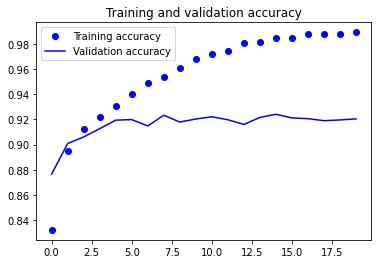

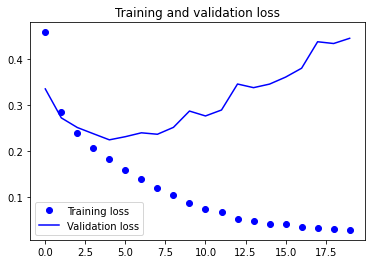

In [17]:
accuracy = fashion_train.history['accuracy']

val_accuracy = fashion_train.history['val_accuracy']

loss = fashion_train.history['loss']

val_loss = fashion_train.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')

plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')

plt.title('Training and validation accuracy')

plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')

plt.plot(epochs, val_loss, 'b', label='Validation loss')

plt.title('Training and validation loss')

plt.legend()

plt.show()

Predict Labels

Found 9201 correct labels


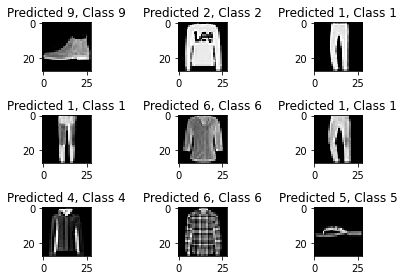

In [24]:
predicted_classes = fashion_model.predict(test_X)

predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

predicted_classes.shape, test_Y.shape

correct = np.where(predicted_classes==test_Y)[0]

print(f"Found {len(correct)} correct labels")

for i, correct in enumerate(correct[:9]):

  plt.subplot(3,3,i+1)

  plt.imshow(test_X[correct].reshape(28,28), cmap='gray', interpolation='none')

  plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_Y[correct]))

  plt.tight_layout()